## Tim en Jelle's notebook voor PCA
Welkom

In [61]:
# just a personal script to change the directory to the right one
import os
os.chdir(r'C:\Users\20223553\documents\GitHub\8CC00-Groep-9')
# current directory
print(os.getcwd())

C:\Users\20223553\documents\GitHub\8CC00-Groep-9


In [62]:
# imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


In [63]:
# load data from csv
#data = pd.read_csv('data/tested_molecules_with_descriptors.csv')
data = pd.read_csv('data/untested_molecules_with_descriptors.csv')
data.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C[C@@H](Sc1nc(=O)cc(N)[nH]1)C(=O)NC1CCCCC1,NaN,NaN,12.102478,12.102478,0.021321,-0.399409,0.573774,17.650000,296.396,...,1,0,0,0,0,0,0,0,0,0
1,O=C(CCN1C(=O)COc2ccccc21)NCc1cccs1,NaN,NaN,11.985063,11.985063,0.021654,-0.120596,0.919617,13.454545,316.382,...,0,0,0,0,0,0,0,1,0,0
2,Cn1nnnc1SCC(=O)N1CC[NH+](Cc2ccccc2)CC1,NaN,NaN,12.287562,12.287562,0.163668,0.163668,0.727985,15.782609,333.441,...,1,0,0,0,1,0,0,0,0,0
3,CCOC(=O)CCP(=O)([O-])[C@@H](O)c1ccc(OC)cc1,NaN,NaN,11.932898,11.932898,0.197446,-4.142696,0.601737,12.800000,301.255,...,0,0,0,0,0,0,0,0,0,0
4,C=CCNC(=O)c1cc(-c2ccccc2O)on1,NaN,NaN,11.589256,11.589256,0.075648,-0.346925,0.806028,10.000000,244.250,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Separate the molecular descriptors from the inhibition labels and SMILES
df_descriptors = data[['PKM2_inhibition', 'ERK2_inhibition']]
df_data= data.drop(columns=['PKM2_inhibition', 'ERK2_inhibition', 'SMILES'])
df_descriptors.head()

,PKM2_inhibition,ERK2_inhibition
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [65]:
# Identify columns with zero variance (have no discriminatory information)
zero_variance_columns = df_data.columns[df_data.nunique() <= 1]

# Print or remove these columns
print("Columns with zero variance:", zero_variance_columns)
df_data = df_data.drop(columns=zero_variance_columns)

Columns with zero variance: Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_SH', 'fr_aldehyde',
       'fr_azide', 'fr_benzodiazepine', 'fr_diazo', 'fr_epoxide', 'fr_isocyan',
       'fr_isothiocyan', 'fr_lactam', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan'],
      dtype='object')


In [66]:
# check if descriptors are normally distributed 
from scipy.stats import shapiro

# Initialize a counter for normally distributed columns
num_norm_columns = 0
alpha = 0.05
# Iterate over each column in df_data
for column in df_data.columns:
    # Perform Shapiro-Wilk test for normality
    stat, p = shapiro(df_data[column])
    
    # Check if the p-value is greater than the significance level (alpha)
    if p > alpha:
        num_norm_columns += 1

# Calculate the percentage of normally distributed columns
percentage_norm_columns = (num_norm_columns / len(df_data.columns)) * 100

percentage_norm_columns

0.5208333333333333

In [67]:
# data is not normally distributed, so we need to scale it, we will use MinMaxScaler
# # Standardize the features by scaling them to have mean 0 and variance 1
scalerstandard = StandardScaler()
df_normal = scalerstandard.fit_transform(df_data)
# write scaled data to a new csv file
df_out = pd.concat([df_descriptors, pd.DataFrame(df_normal, columns=df_data.columns)], axis=1)
#df_out.to_csv('normal_tested.csv', index=False)

In [68]:
scalerminmax = MinMaxScaler()
df_scaled = scalerminmax.fit_transform(df_data)

<Axes: >

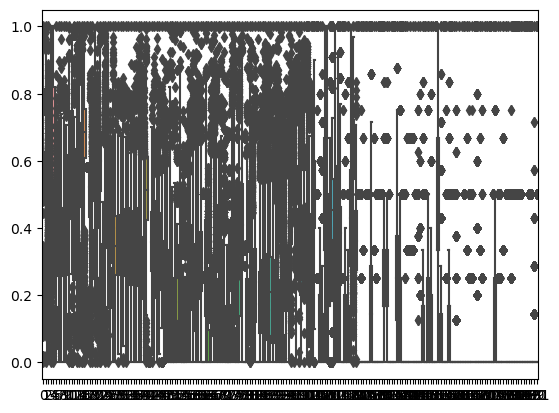

In [69]:
import seaborn as sns
sns.boxplot(data=df_scaled)

In [70]:
# write scaled data to a new csv file
df_out = pd.concat([df_descriptors, pd.DataFrame(df_scaled, columns=df_data.columns)], axis=1)
#df_out.to_csv('scaled_tested.csv', index=False)

In [71]:
# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

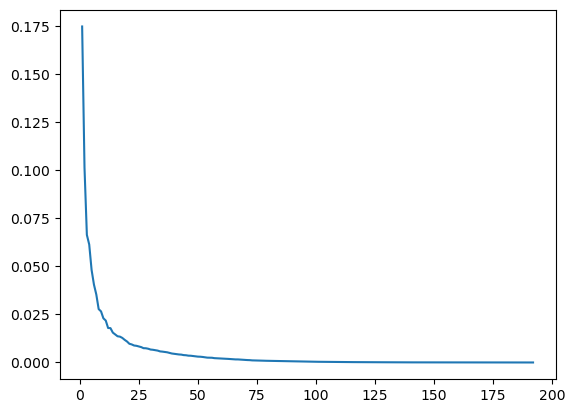

In [72]:
# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# visualize explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)

Text(0.5, 1.0, 'Cumulative explained variance plot (untested dataset)')

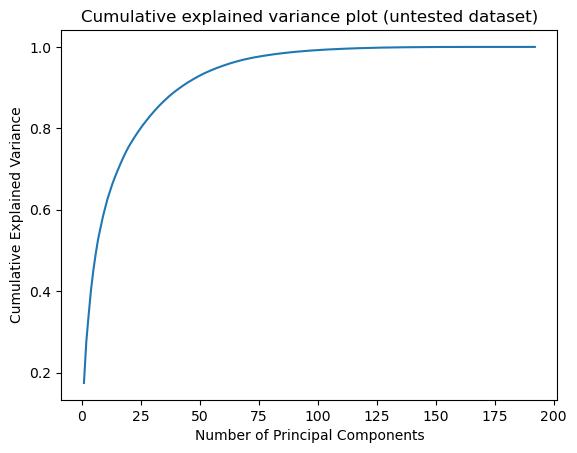

In [73]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
# visualize cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
#plt.title('Cumulative explained variance plot (tested dataset)')
plt.title('Cumulative explained variance plot (untested dataset)')

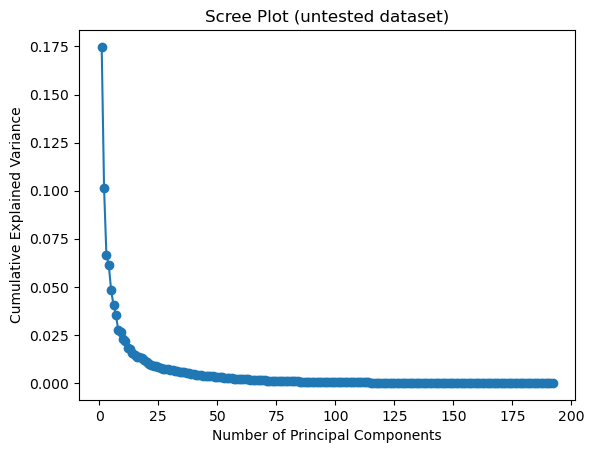

In [74]:


# Create the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
#plt.title('Scree Plot (tested dataset)')
plt.title('Scree Plot (untested dataset)')
plt.show()
# elbow around 10 components

In [75]:
# keep 90% of the variance
num_components = (cumulative_explained_variance < 0.9).sum() + 1
print("Number of components that explain 90% of the variance:", num_components)
# Apply PCA with the number of components that explain 90% of the variance
pca = PCA(n_components=num_components) # to fit model
# pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df_scaled)

Number of components that explain 90% of the variance: 42


In [76]:
# # add the SMILES and inhibition labels back to the PCA data
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(num_components)])
# df_pca = pd.concat([df_pca, df_descriptors], axis=1)
# df_pca.drop(columns=['PKM2_inhibition', 'ERK2_inhibition'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,-0.506291,-0.530563,0.604416,-0.375361,-0.384169,-0.381091,-0.576538,0.360559,-0.254937,0.018197,...,-0.065921,-0.121244,0.102919,0.038099,0.033666,-0.121782,-0.190059,0.133962,0.108354,-0.063845
1,-0.324602,-0.088020,-0.289667,0.023636,-0.041126,-0.276861,0.025458,0.244078,0.383518,-0.082569,...,-0.086694,0.072619,-0.021522,0.213283,0.193989,-0.145631,-0.019054,-0.106595,0.077791,-0.069767
2,0.070954,-0.035323,0.915585,0.228246,-0.259785,0.486857,-0.443839,-0.094016,0.186651,-0.510483,...,0.041842,0.038586,-0.010927,0.284243,0.008088,-0.084850,0.016891,0.138222,0.006364,0.076527
3,-0.385204,-0.623824,-0.619722,-0.574828,-0.333737,0.240996,0.349752,0.182036,-0.413503,0.195058,...,-0.147477,0.153422,-0.216576,0.151146,0.063422,0.261636,0.031929,0.065472,0.061112,0.137932
4,-1.020383,0.200368,-0.385310,-0.104748,-0.377866,-0.216932,-0.059881,-0.082008,-0.095476,0.093702,...,-0.065398,-0.146171,-0.238539,0.187566,0.013652,0.141163,0.136761,-0.132408,-0.021781,0.064056


In [77]:
# # plot the first two components
# plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_descriptors['PKM2_inhibition'])
# plt.xlabel('PC1')
# plt.ylabel('PC2')

In [78]:
# # plot the first two components
# plt.scatter(df_pca['PC1'], df_pca['PC7'], c=df_descriptors['ERK2_inhibition'])
# plt.xlabel('PC1')
# plt.ylabel('PC2')

In [79]:
# save to csv
#df_pca.to_csv('PCA_data_untested.csv', index=False)